In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import os
os.chdir('/content/drive/My Drive/Proje Dudak Okuma/')
!ls

In [ ]:
!unzip ./veriseti.zip

In [ ]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

pic_size = 224
base_path = "/content/drive/My Drive/Proje Dudak Okuma/veriseti/"

In [ ]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")
for expression in os.listdir(base_path + "test"):
    print(str(len(os.listdir(base_path + "test/" + expression))) + " " + expression + " images")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 20

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

nb_classes = 20
model = Sequential()


model.add(Conv2D(64,(3,3), padding='same', input_shape=(224, 224,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     5

In [ ]:
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("my_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
112/112 [==============================] - 1348s 12s/step - loss: 3.3547 - accuracy: 0.0717 - val_loss: 2.8766 - val_accuracy: 0.1036
Epoch 2/50
112/112 [==============================] - 605s 5s/step - loss: 3.0228 - accuracy: 0.1046 - val_loss: 2.8992 - val_accuracy: 0.0911
Epoch 3/50
112/112 [==============================] - 589s 5s/step - loss: 2.8859 - accuracy: 0.1349 - val_loss: 2.9725 - val_accuracy: 0.0786
Epoch 4/50
112/112 [==============================] - 582s 5s/step - loss: 2.8230 - accuracy: 0.1460 - val_loss: 3.0166 - val_accuracy: 0.0857
Epoch 5/50
112/112 [==============================] - 592s 5s/step - loss: 2.7514 - accuracy: 0.1508 - val_loss: 3.0019 - val_accuracy: 0.0964
Epoch 6/50
112/112 [==============================] - 598s 5s/step - loss: 2.6156 - accuracy: 0.1963 - val_loss: 2.9568 - val_accuracy: 0.1161
Epoch 7/50
112/112 [==============================] - 591s 5s/step - loss: 2.5140 - accuracy: 0.2206 - val_loss: 3.0162 - val_accuracy: 0.10

In [ ]:
from keras.models import load_model

model_json = model.to_json()
with open("my_newmodel.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('my_newmodel.h5') 

fname = "newweightsCNNmodel.hdf5"
model.save_weights(fname, overwrite = True)
#model = load_model('my_model.h5')

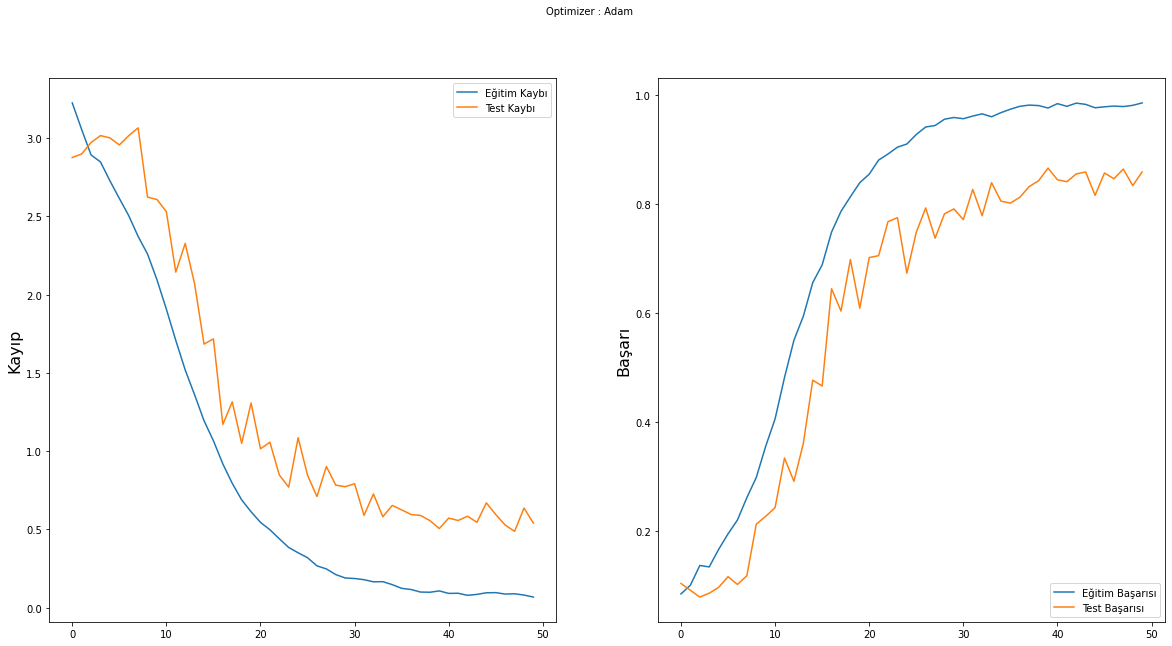

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Kayıp', fontsize=16)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Test Kaybı')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Başarı', fontsize=16)
plt.plot(history.history['accuracy'], label='Eğitim Başarısı')
plt.plot(history.history['val_accuracy'], label='Test Başarısı')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


<Figure size 432x288 with 0 Axes>

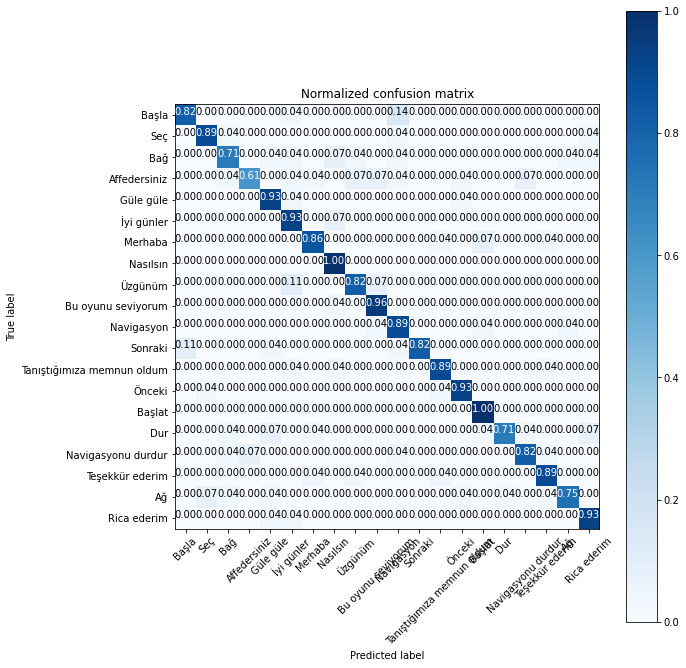

In [ ]:
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names =  ["Başla", "Seç", "Bağ", "Affedersiniz", "Güle güle", "İyi günler",
                     "Merhaba", "Nasılsın", "Üzgünüm", "Bu oyunu seviyorum", "Navigasyon", 
                     "Sonraki", "Tanıştığımıza memnun oldum" ,"Önceki", "Başlat", "Dur", "Navigasyonu durdur",
                     "Teşekkür ederim", "Ağ", "Rica ederim"]

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
from keras.models import model_from_json
json_file = open('./my_newmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("./my_newmodel.h5")
print("Dosya Yüklendi") 
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Dosya Yüklendi


In [ ]:
from keras.models import model_from_json
import numpy as np

EMOTIONS_LIST =  ["Başla", "Seç", "Bağ", "Affedersiniz", "Güle güle", "İyi günler",
                     "Merhaba", "Nasılsın", "Üzgünüm", "Bu oyunu seviyorum", "Navigasyon", 
                     "Sonraki", "Tanıştığımıza memnun oldum" ,"Önceki", "Başlat", "Dur", "Navigasyonu durdur",
                     "Teşekkür ederim", "Ağ", "Rica ederim"]


In [ ]:
import cv2
import numpy as np
image = cv2.imread('/content/drive/My Drive/Proje Dudak Okuma/veriseti/test/Teşekkürler/9.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = gray.reshape(224,224,1)

In [ ]:
EMOTIONS_LIST[loaded_model.predict_classes(np.array([gray]))[0]]

In [ ]:
model.predict(np.array([gray]))